# Flight 08 N2468Z - Stall Testing Bank & Pitch Angles

Stall tests of BD-4C N2468Z on 23 March 2019 at St. Charles County Smartt Airport (KSET).

## Setup

In [10]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sys
sys.path.append('../..')
from MglEfisPlotter import *

In [11]:
plt.rcParams['figure.figsize'] = (14, 10)

Load the flights from the file exported from the MGL iEFIS.

In [19]:
datafile = 'IEFISBB.DAT'
minTimestamp = 0
maxTimestamp = 600000000

flights = createFlights(datafile, minTimestamp, maxTimestamp)
for i in range(0, len(flights)):
    print(i, ':', flights[i])

f = flights[0]
p = Plot(f)
print(f)

0 : Flight at 2019-03-23 14:14:28 to 2019-03-23 14:34:28,  5161 messages, timestamps 485,417,881 to 485,419,162
1 : Flight at 2019-03-20 15:41:18 to 2019-03-20 15:52:06,  2810 messages, timestamps 485,030,479 to 485,031,171
2 : Flight at 2019-03-20 15:41:18 to 2019-03-21 15:12:08, 21232 messages, timestamps 485,153,850 to 485,159,687
3 : Flight at 2019-03-23 12:51:17 to 2019-03-23 12:58:31,  1773 messages, timestamps 485,412,047 to 485,412,509
4 : Flight at 2019-03-23 13:56:40 to 2019-03-23 14:14:23,  4497 messages, timestamps 485,416,486 to 485,417,877
Flight at 2019-03-23 14:14:28 to 2019-03-23 14:34:28,  5161 messages, timestamps 485,417,881 to 485,419,162


## Graphs

In [20]:
t = f.listData('asi')
asi = pd.DataFrame(t, columns=['minutes', 'asi'])

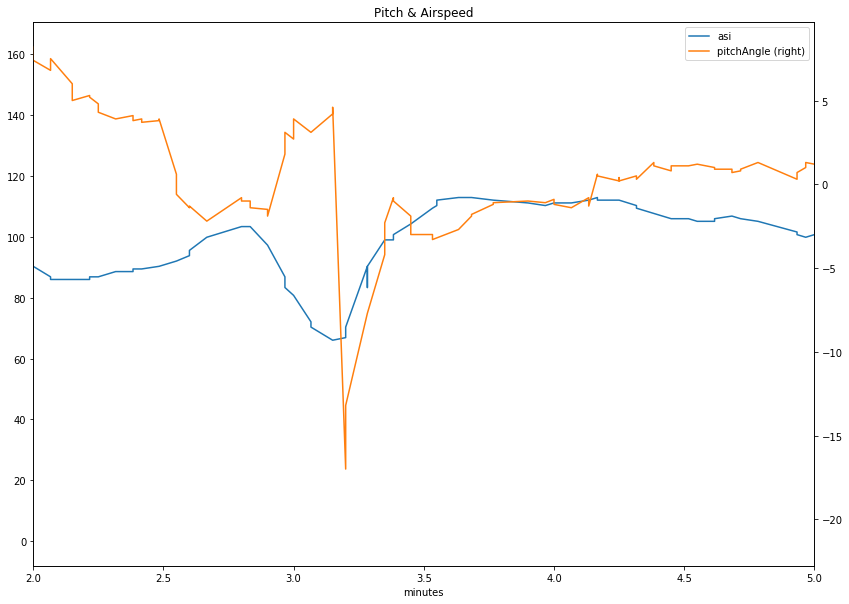

In [24]:
t = f.listData('pitchAngle')
pitch = pd.DataFrame(t, columns=['minutes', 'pitchAngle'])

merged = asi.merge(pitch)
merged.plot(x='minutes', secondary_y='pitchAngle', xlim=(2, 5), title='Pitch & Airspeed')
plt.savefig('pitch.png')

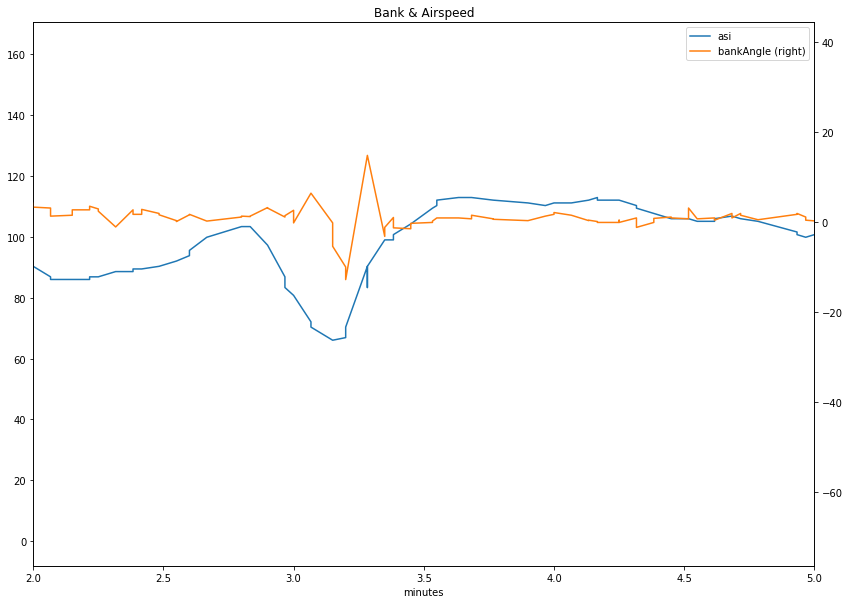

In [25]:
t = f.listData('bankAngle')
bank = pd.DataFrame(t, columns=['minutes', 'bankAngle'])

merged = asi.merge(bank)
merged.plot(x='minutes', secondary_y='bankAngle', xlim=(2, 5), title='Bank & Airspeed')
plt.savefig('bank.png')

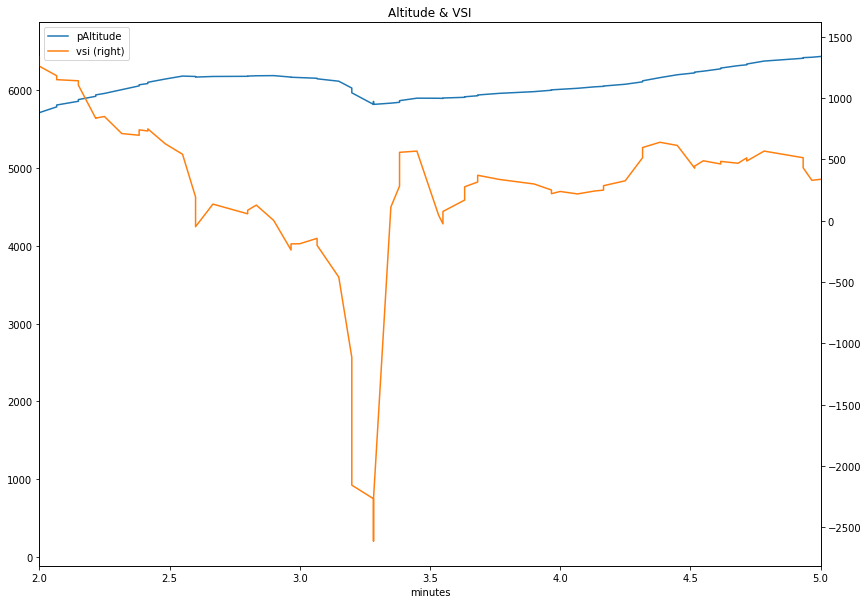

In [26]:
pAltitude = pd.DataFrame(f.listData('pAltitude'), columns=['minutes', 'pAltitude'])
vsi = pd.DataFrame(f.listData('vsi'), columns=['minutes', 'vsi'])

merged = pAltitude.merge(vsi)
merged.plot(x='minutes', secondary_y='vsi', xlim=(2, 5), title='Altitude & VSI')